# Mataija Henderson

# Research Question

**Does the relationship between flight distance and total flight delay time leave more loyal or disloyal customers dissatified with the flight, and are customers travelling for personal or business reasons more likely to be dissatisfied due to this relationship?**

## Research question/interests

I am mainly interested in psychology. A few topics that I enjoy learning about are social and developmental psychology. Having two members interested in psychology and one interested in management has led us to look at airline customer data to see customer satisfaction.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dta = pd.read_csv("../data/raw/Invistico_Airline.csv")



Data analysis plan: To answer this question, I will make a subsetted dataframe only including the customer satisfaction score, arrival delay, departure delay, type of travel, and class columns to make the dataset more manageable to work with. Then, I will make two graphs, one for arrival delay and one for departure delay looking at the level of satisfaction for customers based on their type of travel, possibly sorted into time intervals to condense the data in the graph and make it easier to read, to see which type of delay causes a bigger decrease in satisfaction. I will then do the same for graphs of loyalty status to compare the two.


# Exploratory Data Analysis

In [ ]:
dta.describe()
dta.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# Looking at delay
dtaDelays = pd.DataFrame(dta, columns= ['Departure Delay in Minutes','Arrival Delay in Minutes'])
dtaDelays

,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0.0
1,310,305.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
129875,0,0.0
129876,174,172.0
129877,155,163.0
129878,193,205.0


In [ ]:
# looking at a subset of only the variables of interest
dtaAll = dta[['Type of Travel','Customer Type','Departure Delay in Minutes','Arrival Delay in Minutes', 'satisfaction']]
dtaAll

,Type of Travel,Customer Type,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Personal Travel,Loyal Customer,0,0.0,satisfied
1,Personal Travel,Loyal Customer,310,305.0,satisfied
2,Personal Travel,Loyal Customer,0,0.0,satisfied
3,Personal Travel,Loyal Customer,0,0.0,satisfied
4,Personal Travel,Loyal Customer,0,0.0,satisfied
...,...,...,...,...,...
129875,Personal Travel,disloyal Customer,0,0.0,satisfied
129876,Personal Travel,disloyal Customer,174,172.0,dissatisfied
129877,Personal Travel,disloyal Customer,155,163.0,dissatisfied
129878,Personal Travel,disloyal Customer,193,205.0,dissatisfied


In [ ]:
dtaAll.dropna() # around 400 na cases in the variables of interest

,Type of Travel,Customer Type,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Personal Travel,Loyal Customer,0,0.0,satisfied
1,Personal Travel,Loyal Customer,310,305.0,satisfied
2,Personal Travel,Loyal Customer,0,0.0,satisfied
3,Personal Travel,Loyal Customer,0,0.0,satisfied
4,Personal Travel,Loyal Customer,0,0.0,satisfied
...,...,...,...,...,...
129875,Personal Travel,disloyal Customer,0,0.0,satisfied
129876,Personal Travel,disloyal Customer,174,172.0,dissatisfied
129877,Personal Travel,disloyal Customer,155,163.0,dissatisfied
129878,Personal Travel,disloyal Customer,193,205.0,dissatisfied


In [ ]:
dta.dropna() # getting rid of na values in the full dataframe too

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [ ]:
# Adding a total delay column
dta['Total Delay'] = dta['Departure Delay in Minutes'] + dta['Arrival Delay in Minutes']
dta.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,615.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,0.0


In [ ]:
# Checking for outliers
print(dta['Arrival Delay in Minutes'].min())

print(dta['Arrival Delay in Minutes'].max())
dta[('Arrival Delay in Minutes')].describe()

0.0
1584.0


count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
# The mean + 2 standard deviations, this will separate the top 5% of points from the rest which can help find outliers
# in arrival delays.
float(15.091129) + (2*(float(38.465650)))

92.02242899999999

In [ ]:
# Checking for outliers
print(dta['Departure Delay in Minutes'].min())

print(dta['Departure Delay in Minutes'].max())

dta[('Departure Delay in Minutes')].describe()

0
1592


count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
# The mean + 2 standard deviations, this will separate the top 5% of points from the rest which can help find outliers
# in departure delays.
float(14.713713) + (2*(float(38.071126)))

90.855965

Plotting the relationships

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

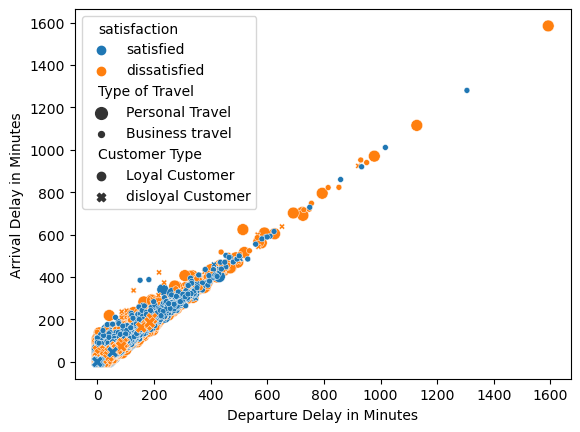

In [ ]:
# Plotting relationship between all variables
sns.scatterplot(data=dta, x='Departure Delay in Minutes',
                y='Arrival Delay in Minutes', hue = 'satisfaction', style ='Customer Type', size='Type of Travel')


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

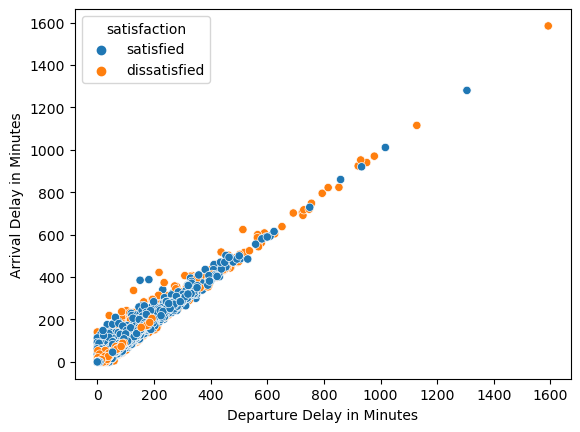

In [ ]:
# Splitting up the variables, the above scatterplot is very cluttered

# Delay times and Satisfaction levels only
sns.scatterplot(data=dta, x='Departure Delay in Minutes',
                y='Arrival Delay in Minutes', hue = 'satisfaction')

<AxesSubplot:xlabel='Customer Type', ylabel='Total Delay'>

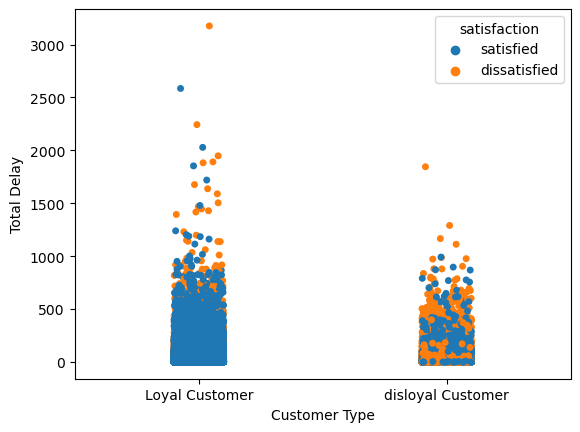

In [ ]:
# Delay and Customer Types with satisfaction
sns.stripplot(data=dta, x='Customer Type', y='Total Delay', hue = 'satisfaction')

More customers that are loyal are satisfied, even with high delays and there are much more dissatisfied customers in the disloyal group, even with low delays.

<AxesSubplot:xlabel='Type of Travel', ylabel='Total Delay'>

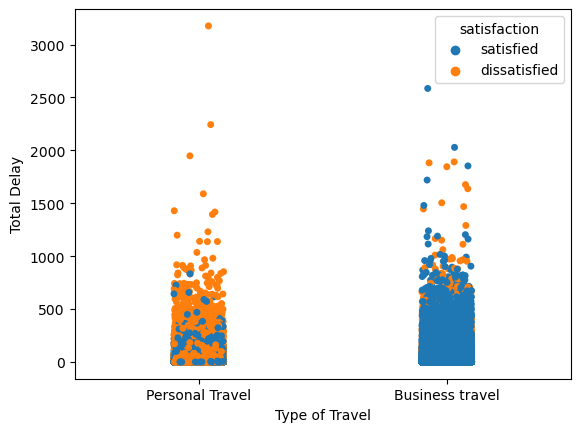

In [ ]:
sns.stripplot(data=dta, x='Type of Travel', y='Total Delay', hue = 'satisfaction')

Many more people were more dissatisfied when there were delays of any level when travelling for personal reasons compared to business reasons. Even higher levels of delays in business travel did not leave the customer dissatisfied.

<AxesSubplot:xlabel='Type of Travel', ylabel='Departure Delay in Minutes'>

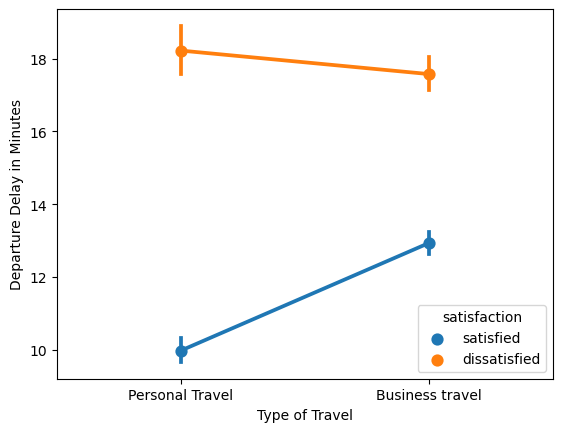

In [ ]:
# Departure Delay and type of travel relationships
sns.pointplot(data=dta, x='Type of Travel', y='Departure Delay in Minutes', hue = 'satisfaction')


<AxesSubplot:xlabel='Type of Travel', ylabel='Arrival Delay in Minutes'>

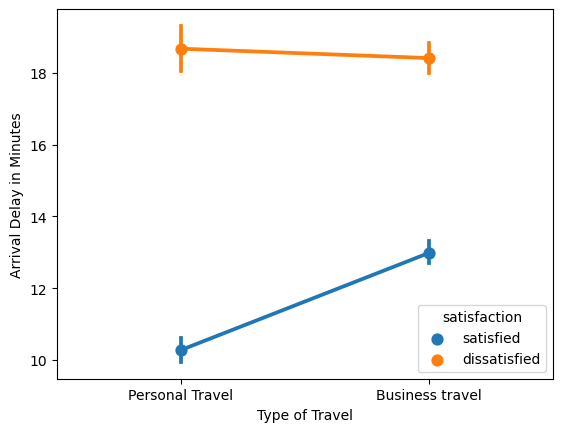

In [ ]:
# Arrival delay and type of travel relationships
sns.pointplot(data=dta, x='Type of Travel', y='Arrival Delay in Minutes', hue = 'satisfaction')

Both types of travel have similarly high dissatisfation levels when arrival and departure delays are high, and personal travel types have lower levels of satisfaction than business travel customers, even with low delays in both arrival and departure.

<AxesSubplot:xlabel='Customer Type', ylabel='Arrival Delay in Minutes'>

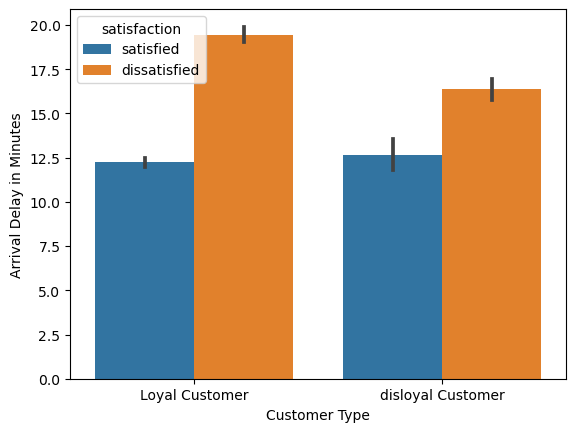

In [ ]:
# Arrival delay and customer type relationships
sns.barplot(data=dta, x='Customer Type', y='Arrival Delay in Minutes', hue = 'satisfaction')


<AxesSubplot:xlabel='Customer Type', ylabel='Departure Delay in Minutes'>

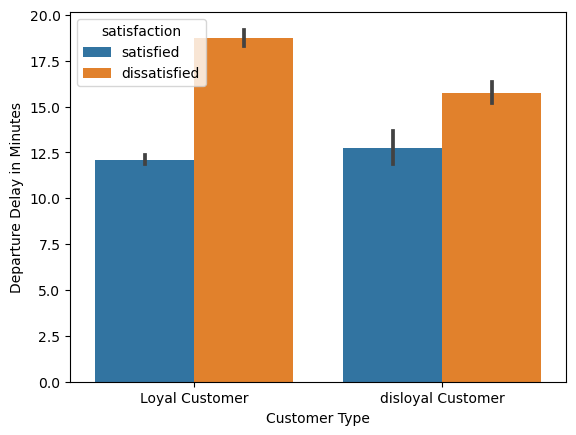

In [ ]:
# Departure delay and customer type relationships
sns.barplot(data=dta, x='Customer Type', y='Departure Delay in Minutes', hue = 'satisfaction')

In both the cases of arrival and departure delays, there are far more customers that are dissatisfied, espeically in the loyal customer category. In both loyal and disloyal customer categories, the level of satisfaction and average departure and arrival delay amount of time are similar.
For future analysis, barplots make it easier to visualize the relationship than the previous strip plots.

<seaborn.axisgrid.FacetGrid>

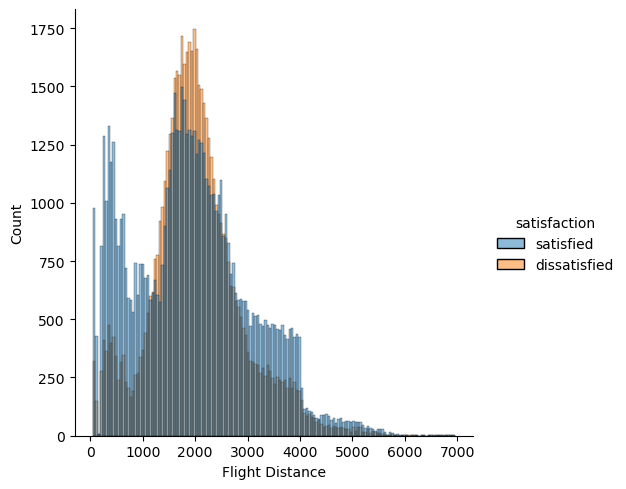

In [ ]:
# Interested in other relationships in the data, this is flight distance

sns.displot(data=dta,x='Flight Distance',hue='satisfaction')  

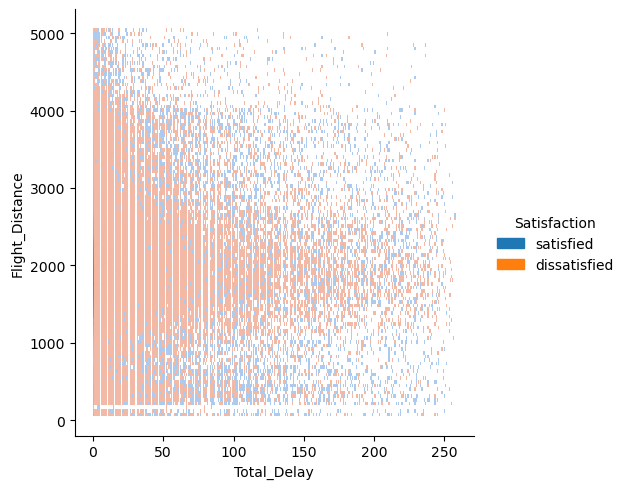

In [11]:
# Flight distance + delay and satisfaction

sns.displot(data=data1,x='Total_Delay', y= 'Flight_Distance', hue='Satisfaction')  

There seem to be the most unsatisfied customers in medium distance flights and shorter flights, but less unsatisfied customers with longer distance flights. High delay times seem to cause the most dissatisfaction when the flight distance in in the middle range. This is interesting relationship that I would like to further investigate.

<Axes: xlabel='Flight_Distance', ylabel='Total_Delay'>

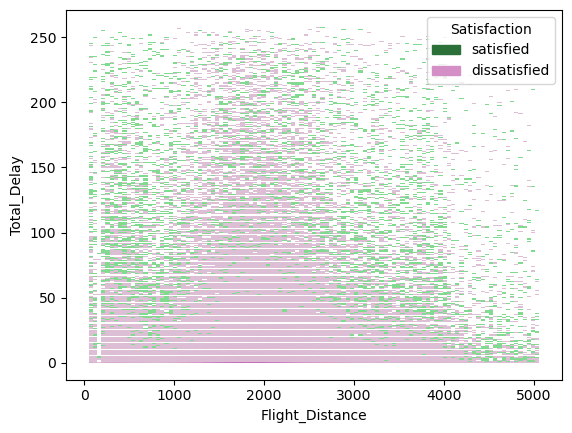

In [32]:
sns.histplot(
    data1,
    x="Flight_Distance", y="Total_Delay", hue="Satisfaction",
    multiple="stack",
    palette="cubehelix"
)

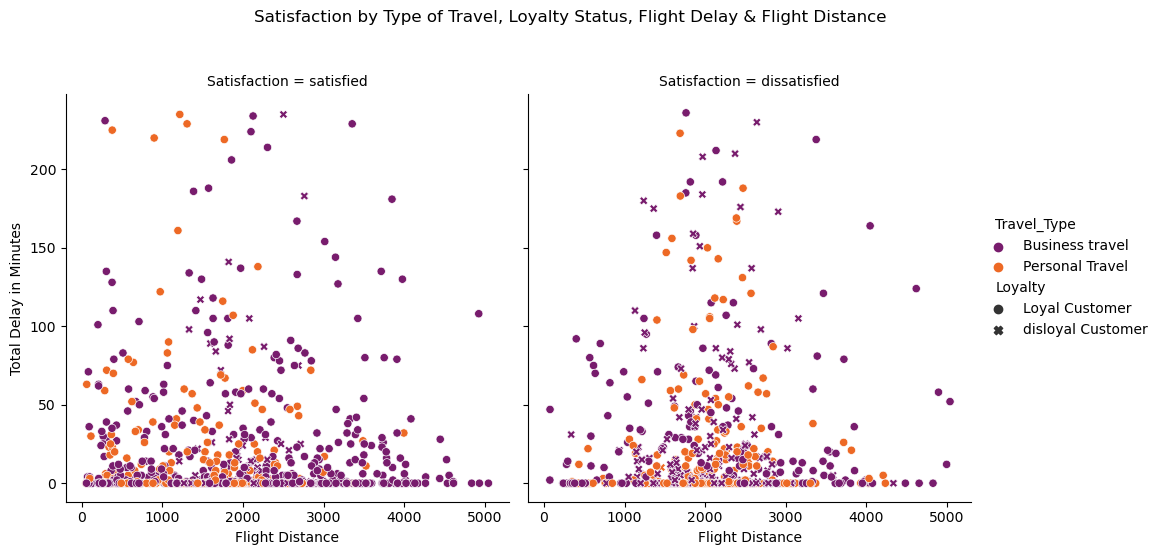

In [47]:
graph1 = sns.relplot(
    data=data1.sample(n=1500),
    x="Flight_Distance", y="Total_Delay", hue="Travel_Type", style ="Loyalty",
    col="Satisfaction", palette="inferno",
)

graph1.fig.suptitle("Satisfaction by Type of Travel, Loyalty Status, Flight Delay & Flight Distance", y = 1.1)
graph1.set_ylabels("Total Delay in Minutes")
graph1.set_xlabels("Flight Distance")

In [50]:
graph1.savefig("M6graph1.png")

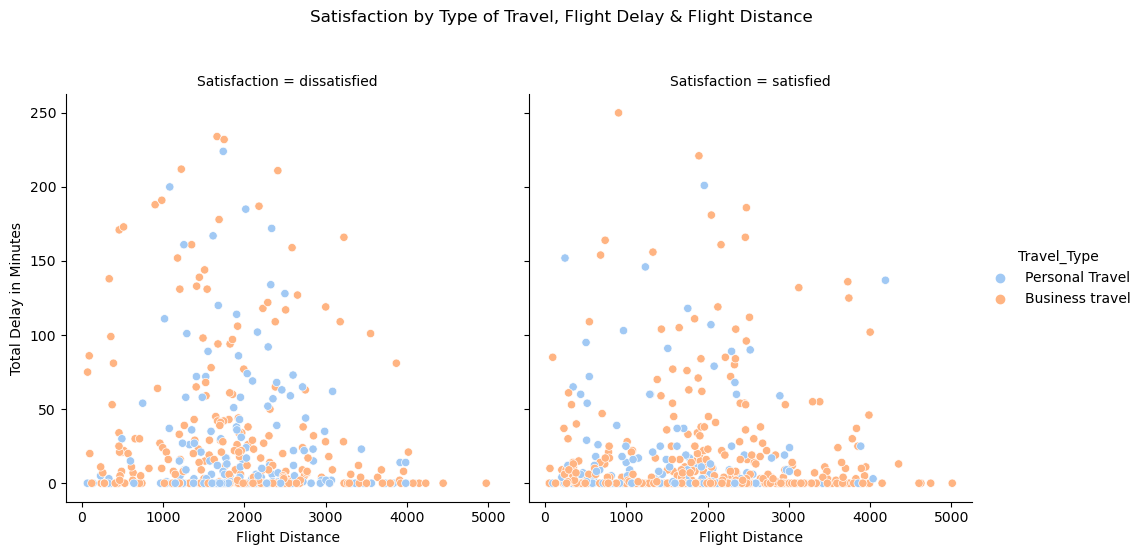

In [54]:
graph2 = sns.relplot(
    x="Flight_Distance", 
    y="Total_Delay", 
    data=data1.sample(n=1000),
    palette='pastel',
    col="Satisfaction", 
    hue="Travel_Type")
graph2.fig.suptitle("Satisfaction by Type of Travel, Flight Delay & Flight Distance", y = 1.1)
graph2.set_ylabels("Total Delay in Minutes")
graph2.set_xlabels("Flight Distance")
graph2

In [55]:
graph2.savefig("M6graph2.png")

# Data Analysis Pipeline

In [2]:
# Step 1: Load data
dta = pd.read_csv("../data/raw/Invistico_Airline.csv")
dta

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
# Step 2: Clean data

data = (dta.drop(['Gender', 'Age', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness','Online boarding', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment'], axis=1)
        .dropna(subset = ['satisfaction','Customer Type','Type of Travel','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'])
        .reset_index(drop =True)
)

data


,satisfaction,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,Personal Travel,265,0,0.0
1,satisfied,Loyal Customer,Personal Travel,2464,310,305.0
2,satisfied,Loyal Customer,Personal Travel,2138,0,0.0
3,satisfied,Loyal Customer,Personal Travel,623,0,0.0
4,satisfied,Loyal Customer,Personal Travel,354,0,0.0
...,...,...,...,...,...,...
129482,satisfied,disloyal Customer,Personal Travel,1731,0,0.0
129483,dissatisfied,disloyal Customer,Personal Travel,2087,174,172.0
129484,dissatisfied,disloyal Customer,Personal Travel,2320,155,163.0
129485,dissatisfied,disloyal Customer,Personal Travel,2450,193,205.0


In [4]:
# Step 3: Process Data

DDoutliers = data['Departure Delay in Minutes'].mean() +(data['Departure Delay in Minutes'].std()*3)
ADoutliers = data['Arrival Delay in Minutes'].mean() +(data['Arrival Delay in Minutes'].std()*3)
FDoutliers = data['Flight Distance'].mean() +(data['Flight Distance'].std()*3)

data1 = (data.assign(Total_Delay = (data['Departure Delay in Minutes']+data['Arrival Delay in Minutes']))
         .rename(columns={'Departure Delay in Minutes': 'Departure_Delay', 'Arrival Delay in Minutes' : 'Arrival_Delay',
                         'Customer Type': 'Loyalty', 'Flight Distance' : 'Flight_Distance', 'Type of Travel':'Travel_Type',
                         'satisfaction':'Satisfaction'})
         
         .loc[lambda x: x['Departure_Delay']<DDoutliers]     # removing the outliers in each row
         .loc[lambda x: x['Arrival_Delay']<ADoutliers]
         .loc[lambda x: x['Flight_Distance']<FDoutliers]
         .sort_values('Total_Delay', ascending=False)         # showing the largest total delay values at the top
         .reset_index(drop=True)
)
data1


,Satisfaction,Loyalty,Travel_Type,Flight_Distance,Departure_Delay,Arrival_Delay,Total_Delay
0,satisfied,Loyal Customer,Personal Travel,2651,128,130.0,258.0
1,dissatisfied,Loyal Customer,Business travel,2579,128,130.0,258.0
2,dissatisfied,disloyal Customer,Business travel,1049,128,129.0,257.0
3,satisfied,Loyal Customer,Business travel,2880,128,128.0,256.0
4,dissatisfied,Loyal Customer,Business travel,2527,128,128.0,256.0
...,...,...,...,...,...,...,...
125795,satisfied,disloyal Customer,Business travel,2637,0,0.0,0.0
125796,dissatisfied,disloyal Customer,Business travel,1637,0,0.0,0.0
125797,satisfied,disloyal Customer,Business travel,2295,0,0.0,0.0
125798,satisfied,disloyal Customer,Business travel,1938,0,0.0,0.0


**Wrapping method chain in a function**

In [5]:
def clean_and_process(csv_url):
    dta = pd.read_csv(csv_url)
    
    data = (dta.drop(['Gender', 'Age', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness','Online boarding', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment'], axis=1)
        .dropna(subset = ['satisfaction','Customer Type','Type of Travel','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'])
        .reset_index(drop =True)
            )
    
    DDoutliers = data['Departure Delay in Minutes'].mean() +(data['Departure Delay in Minutes'].std()*3)
    ADoutliers = data['Arrival Delay in Minutes'].mean() +(data['Arrival Delay in Minutes'].std()*3)
    FDoutliers = data['Flight Distance'].mean() +(data['Flight Distance'].std()*3)
    
    data1 = (data.assign(Total_Delay = (data['Departure Delay in Minutes']+data['Arrival Delay in Minutes']))
         .rename(columns={'Departure Delay in Minutes': 'Departure_Delay', 'Arrival Delay in Minutes' : 'Arrival_Delay',
                         'Customer Type': 'Loyalty', 'Flight Distance' : 'Flight_Distance', 'Type of Travel':'Travel_Type',
                         'satisfaction':'Satisfaction'})
         .loc[lambda x: x['Departure_Delay']<DDoutliers]     # removing the outliers in each row
         .loc[lambda x: x['Arrival_Delay']<ADoutliers]
         .loc[lambda x: x['Flight_Distance']<FDoutliers]
         .sort_values('Total_Delay', ascending=False)         # showing the largest total delay values at the top
         .reset_index(drop=True)
            )
    
    
    return data1

In [6]:
clean_and_process("../data/raw/Invistico_Airline.csv")

,Satisfaction,Loyalty,Travel_Type,Flight_Distance,Departure_Delay,Arrival_Delay,Total_Delay
0,satisfied,Loyal Customer,Personal Travel,2651,128,130.0,258.0
1,dissatisfied,Loyal Customer,Business travel,2579,128,130.0,258.0
2,dissatisfied,disloyal Customer,Business travel,1049,128,129.0,257.0
3,satisfied,Loyal Customer,Business travel,2880,128,128.0,256.0
4,dissatisfied,Loyal Customer,Business travel,2527,128,128.0,256.0
...,...,...,...,...,...,...,...
125795,satisfied,disloyal Customer,Business travel,2637,0,0.0,0.0
125796,dissatisfied,disloyal Customer,Business travel,1637,0,0.0,0.0
125797,satisfied,disloyal Customer,Business travel,2295,0,0.0,0.0
125798,satisfied,disloyal Customer,Business travel,1938,0,0.0,0.0


**Importing function**

In [9]:

import sys
sys.path.append("./code")
import project_functions2

In [10]:
project_functions2.clean_and_process("../data/raw/Invistico_Airline.csv")

,Satisfaction,Loyalty,Travel_Type,Flight_Distance,Departure_Delay,Arrival_Delay,Total_Delay
0,satisfied,Loyal Customer,Personal Travel,2651,128,130.0,258.0
1,dissatisfied,Loyal Customer,Business travel,2579,128,130.0,258.0
2,dissatisfied,disloyal Customer,Business travel,1049,128,129.0,257.0
3,satisfied,Loyal Customer,Business travel,2880,128,128.0,256.0
4,dissatisfied,Loyal Customer,Business travel,2527,128,128.0,256.0
...,...,...,...,...,...,...,...
125795,satisfied,disloyal Customer,Business travel,2637,0,0.0,0.0
125796,dissatisfied,disloyal Customer,Business travel,1637,0,0.0,0.0
125797,satisfied,disloyal Customer,Business travel,2295,0,0.0,0.0
125798,satisfied,disloyal Customer,Business travel,1938,0,0.0,0.0


In [7]:
data1.to_csv("projectdata.csv")